# Workshop 3: Linear, Time-Invariant Systems

#### 3.1.1 Implementing Convolution Using Numerical Integration


In [8]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt  

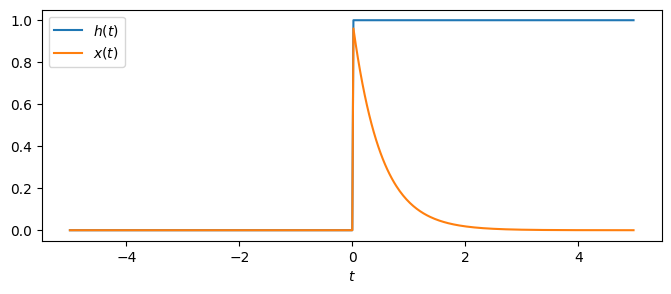

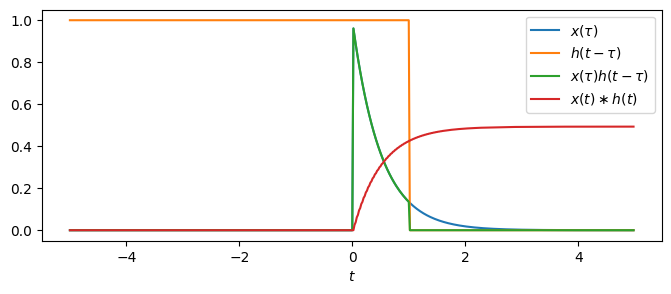

In [10]:
h = lambda t: (t > 0)*1.0
x = lambda t: (t > 0) * np.exp(-2*t) # a = −2
Fs = 50 # Sampling frequency for the plotting
T=5 #Timerange
t = np.arange(-T, T, 1/Fs) # Time samples

plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()

# Plotting
t_ = 1 # For illustration, choose some value for t
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau)*h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t − \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')

# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simpson(y = product(t), x = t) # Actual convolution at time t
    
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

task 2

In [3]:
fs = 1000 # Sampling frequency for the plotting
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])

In [6]:
t = np.arange(-T, T, 1/fs) 
y = integrate.simpson(y = delta(t), x= t)
print(y)

1.000000000000334
